In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 70 #display 70 dpi in Jupyter Notebook, may consider100 dpi 
plt.rcParams['savefig.dpi'] = 70 #define 300 dpi for saving figures

import seaborn as sns
## here are some settings 
sns.set_style('whitegrid')
sns.set(rc={"figure.dpi":70, 'savefig.dpi':70}) #defining dpi setting
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [2]:
# Tells matplotlib to display images inline instead of a new window
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

from time import time
import timeit #imports timeit module

In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures

import sklearn.linear_model as skl_lm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn import neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
df = pd.read_csv('../RiverRoad_Quan_RF.csv')
X = df.drop(['GRID_ID', 'wetland_type', 'wetland', 'FID_RiverRd_AOI'], axis=1)
y = df.FID_RiverRd_AOI
kf = KFold(n_splits=5, random_state=2, shuffle=True)

## Decision Tree Classifier Model(With Gini and Entopy Classifiers)

([<matplotlib.axis.XTick at 0x2877f092250>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

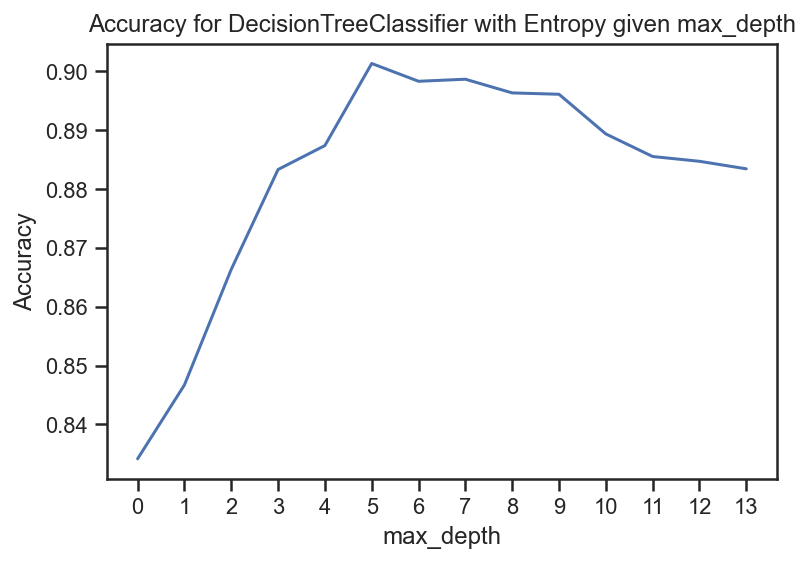

In [6]:
crossvalidation = KFold(n_splits=5, random_state=2, shuffle=True)
score_list = []
for i in range(1, 15):
    model = DecisionTreeClassifier(max_depth=i, criterion="entropy")
    scores = cross_val_score(model, X, y, cv=crossvalidation)
    score_list.append(scores.mean())
plt.plot(range(len(score_list)), score_list)
plt.title("Accuracy for DecisionTreeClassifier with Entropy given max_depth")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.xticks(range(len(score_list)))

([<matplotlib.axis.XTick at 0x2877fdf0c70>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

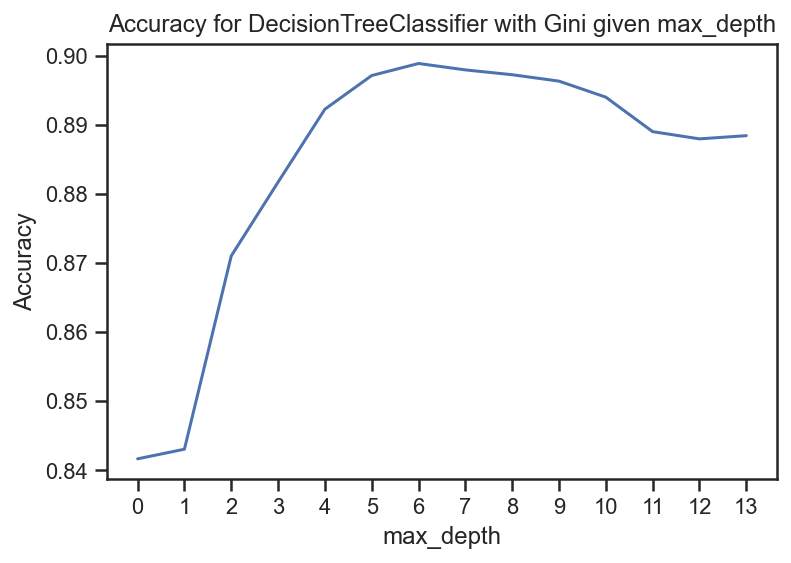

In [7]:
crossvalidation = KFold(n_splits=5, random_state=2, shuffle=True)
score_list = []
for i in range(1, 15):
    model = DecisionTreeClassifier(max_depth=i, criterion="gini")
    scores = cross_val_score(model, X, y, cv=crossvalidation)
    score_list.append(scores.mean())
plt.plot(range(len(score_list)), score_list)
plt.title("Accuracy for DecisionTreeClassifier with Gini given max_depth")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.xticks(range(len(score_list)))

### Decision Tree with Gini

In [11]:
start_time = timeit.default_timer()
acc_score = [];
Truth = [];
Output = [];

for train_index , test_index in kf.split(df):
    X_train , X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = DecisionTreeClassifier(max_depth=6) #criterion='gini'
    model.fit(X_train, y_train)
    pred_values = model.predict(X_test)
    
    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)
    
    Truth.extend(y_test.values.reshape(y_test.shape[0])); ## it is a list
    Output.extend(pred_values);
    
elapsed = timeit.default_timer() - start_time
print(f"{elapsed} Seconds")

1.1263328999999942 Seconds


In [12]:
Truth = np.asarray(Truth)  ## or np.array(Truth)
Output = np.asarray(Output)
np.column_stack((Truth, Output))
print(confusion_matrix(Truth, Output))
print(classification_report(Truth, Output, digits=4))

[[2617  527]
 [ 363 5104]]
              precision    recall  f1-score   support

           0     0.8782    0.8324    0.8547      3144
           1     0.9064    0.9336    0.9198      5467

    accuracy                         0.8966      8611
   macro avg     0.8923    0.8830    0.8872      8611
weighted avg     0.8961    0.8966    0.8960      8611



### Decision Tree with Entropy

In [13]:
start_time = timeit.default_timer()
acc_score = [];
Truth = [];
Output = [];

for train_index , test_index in kf.split(df):
    X_train , X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = DecisionTreeClassifier(max_depth=6, criterion='entropy')
    model.fit(X_train, y_train)
    pred_values = model.predict(X_test)
    
    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)
    
    Truth.extend(y_test.values.reshape(y_test.shape[0])); ## it is a list
    Output.extend(pred_values);
    
elapsed = timeit.default_timer() - start_time
print(f"{elapsed} Seconds")

1.7602344000000016 Seconds


In [14]:
Truth = np.asarray(Truth)  ## or np.array(Truth)
Output = np.asarray(Output)
np.column_stack((Truth, Output))
print(confusion_matrix(Truth, Output))
print(classification_report(Truth, Output, digits=4))

[[2616  528]
 [ 327 5140]]
              precision    recall  f1-score   support

           0     0.8889    0.8321    0.8595      3144
           1     0.9068    0.9402    0.9232      5467

    accuracy                         0.9007      8611
   macro avg     0.8979    0.8861    0.8914      8611
weighted avg     0.9003    0.9007    0.9000      8611



## Bagging: using all features

In [15]:
start_time = timeit.default_timer()
acc_score = [];
Truth = [];
Output = [];

for train_index , test_index in kf.split(df):
    X_train , X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = RandomForestClassifier(max_features=60, random_state=2)
    model.fit(X_train, y_train)
    pred_values = model.predict(X_test)
    
    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)
    
    Truth.extend(y_test.values.reshape(y_test.shape[0])); ## it is a list
    Output.extend(pred_values);
    
elapsed = timeit.default_timer() - start_time
print(f"{elapsed} Seconds")

260.0165444 Seconds


In [16]:
Truth = np.asarray(Truth)  ## or np.array(Truth)
Output = np.asarray(Output)
np.column_stack((Truth, Output))
print(confusion_matrix(Truth, Output))
print(classification_report(Truth, Output, digits=4))

[[2680  464]
 [ 243 5224]]
              precision    recall  f1-score   support

           0     0.9169    0.8524    0.8835      3144
           1     0.9184    0.9556    0.9366      5467

    accuracy                         0.9179      8611
   macro avg     0.9176    0.9040    0.9100      8611
weighted avg     0.9179    0.9179    0.9172      8611



## Random Forests: use sqrt(p) for classification

In [17]:
start_time = timeit.default_timer()
acc_score = [];
Truth = [];
Output = [];

for train_index , test_index in kf.split(df):
    X_train , X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = RandomForestClassifier(max_features=7, random_state=2)
    model.fit(X_train, y_train)
    pred_values = model.predict(X_test)
    
    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)
    
    Truth.extend(y_test.values.reshape(y_test.shape[0])); ## it is a list
    Output.extend(pred_values);
    
elapsed = timeit.default_timer() - start_time
print(f"{elapsed} Seconds")

26.026475500000004 Seconds


In [18]:
Truth = np.asarray(Truth)  ## or np.array(Truth)
Output = np.asarray(Output)
np.column_stack((Truth, Output))
print(confusion_matrix(Truth, Output))
print(classification_report(Truth, Output, digits=4))

[[2633  511]
 [ 200 5267]]
              precision    recall  f1-score   support

           0     0.9294    0.8375    0.8810      3144
           1     0.9116    0.9634    0.9368      5467

    accuracy                         0.9174      8611
   macro avg     0.9205    0.9004    0.9089      8611
weighted avg     0.9181    0.9174    0.9164      8611



## An AdaBoost Classifier

### With SAMME.R Algorithm

In [19]:
start_time = timeit.default_timer()
acc_score = [];
Truth = [];
Output = [];

for train_index , test_index in kf.split(df):
    X_train , X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = AdaBoostClassifier(n_estimators=500, learning_rate = 0.1, algorithm="SAMME.R", random_state=2)
    model.fit(X_train, y_train)
    pred_values = model.predict(X_test)
    
    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)
    
    Truth.extend(y_test.values.reshape(y_test.shape[0])); ## it is a list
    Output.extend(pred_values);
    
elapsed = timeit.default_timer() - start_time
print(f"{elapsed} Seconds")

149.88587009999998 Seconds


In [20]:
Truth = np.asarray(Truth)  ## or np.array(Truth)
Output = np.asarray(Output)
np.column_stack((Truth, Output))
print(confusion_matrix(Truth, Output))
print(classification_report(Truth, Output, digits=4))

[[2563  581]
 [ 275 5192]]
              precision    recall  f1-score   support

           0     0.9031    0.8152    0.8569      3144
           1     0.8994    0.9497    0.9238      5467

    accuracy                         0.9006      8611
   macro avg     0.9012    0.8825    0.8904      8611
weighted avg     0.9007    0.9006    0.8994      8611



### With SAMME Algorithm

In [21]:
start_time = timeit.default_timer()
acc_score = [];
Truth = [];
Output = [];

for train_index , test_index in kf.split(df):
    X_train , X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = AdaBoostClassifier(n_estimators=500, learning_rate = 0.1, algorithm="SAMME", random_state=2)
    model.fit(X_train, y_train)
    pred_values = model.predict(X_test)
    
    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)
    
    Truth.extend(y_test.values.reshape(y_test.shape[0])); ## it is a list
    Output.extend(pred_values);
    
elapsed = timeit.default_timer() - start_time
print(f"{elapsed} Seconds")

148.41316760000007 Seconds


In [22]:
Truth = np.asarray(Truth)  ## or np.array(Truth)
Output = np.asarray(Output)
np.column_stack((Truth, Output))
print(confusion_matrix(Truth, Output))
print(classification_report(Truth, Output, digits=4))

[[2314  830]
 [ 243 5224]]
              precision    recall  f1-score   support

           0     0.9050    0.7360    0.8118      3144
           1     0.8629    0.9556    0.9069      5467

    accuracy                         0.8754      8611
   macro avg     0.8839    0.8458    0.8593      8611
weighted avg     0.8783    0.8754    0.8722      8611



## Gradient Boosting for classification

In [23]:
start_time = timeit.default_timer()
acc_score = [];
Truth = [];
Output = [];

for train_index , test_index in kf.split(df):
    X_train , X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index], y.iloc[test_index]
    
    model =  GradientBoostingClassifier(n_estimators = 500, 
                                           learning_rate = 0.1, 
                                           max_depth = 4, 
                                           random_state = 2)
    model.fit(X_train, y_train)
    pred_values = model.predict(X_test)
    
    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)
    
    Truth.extend(y_test.values.reshape(y_test.shape[0])); ## it is a list
    Output.extend(pred_values);
    
elapsed = timeit.default_timer() - start_time
print(f"{elapsed} Seconds")

483.3413961 Seconds


In [24]:
Truth = np.asarray(Truth)  ## or np.array(Truth)
Output = np.asarray(Output)
np.column_stack((Truth, Output))
print(confusion_matrix(Truth, Output))
print(classification_report(Truth, Output, digits=4))

[[2716  428]
 [ 208 5259]]
              precision    recall  f1-score   support

           0     0.9289    0.8639    0.8952      3144
           1     0.9247    0.9620    0.9430      5467

    accuracy                         0.9261      8611
   macro avg     0.9268    0.9129    0.9191      8611
weighted avg     0.9262    0.9261    0.9255      8611

